# GitHub Activity Plot
We look at number of commits (binned by Month), number of contributors and number of line code changes.

## 1. Clone a repository:
```
$ git clone https://github.com/microsoft/AirSim.git
``` 
 
## 2. Get log:
```
$ git log --date=format:%Y%m%d > AirSimGitHubLog20211017.txt 
```
NB Time formatting options: https://www.ibm.com/docs/en/z-workload-scheduler/9.5.0?topic=troubleshooting-date-time-format-reference-strftime
## 3. Get data

In [82]:
#############################################################
# Commit info
# Coding standard: https://www.python.org/dev/peps/pep-0008/
#############################################################
class CommitInfo():
    """
    Public member variables
    """
    commit1 = ''
    # the following commit listed by "git log" command
    commit2 = ''
    author = ''
    date = ''
    results = []
    # dictionaries of commit counts and unique authors, binned by month 
    commits = {}
    authors = {}
    """
    Public methods
    """
    def process_line(self, line):
        info = line.split()
        # We are expecting lines like:
        # commit c2da7c780fb9a1bcd89001d029dbeb18ba94533f
        # Author: zimmy87 <zimmy87@gmail.com>
        # Date:   20211006
        # First we get the author, when we get the date we have the commit,
        # it can then be stored and both member variables reset
        if len(info) == 0:
            return
        if info[0] == 'commit':
            # print(info[1])
            self.process_commit(info[1])
        if info[0] == 'Author:':
            self.process_author(info[len(info) - 1])
        if info[0] == 'Date:':
            #print(info[1]) 
            self.process_date(info[1])
    def process_commit(self, commit):
        """
        Process commit, store a commit, if two exist, compare and get number of line changes
        NB We put this on hold until 1. git diffs can be accessed though Jupyter Notebook or
        2. data is generated with a shell script, and imported into Jupyter Notebook.
        Input:
            commit: String, commit hash
        Output:
            none
        """
        from os import system
        if self.commit1 == '':
            self.commit1 = commit
        else:
            # print("Processing commit ", self.commit1)
            self.commit2 = commit
            # print(self.commit1)
            self.commit1 = self.commit2
            self.commit2 = ''
            
    def process_author(self, author):
        """
        Store commit author
        Input:
            author: string
        Output:
            none
        """
        self.author = author
        # print(self.author)
        
    def process_date(self, date):
        """
        Store commit date, add entry to dictionary
        Input:
            date: string
        Output:
            none
        """
        self.date = date[0:6]
        # print(self.date)
        # store
        self.results.append([self.date, self.author, self.commit1])
        # add to dictionaries, increment commit count, add unique author
        key = self.date
        self.commits[key] = self.commits[key] + 1 if key in self.commits else 1
        if key in self.authors:
            self.authors[key].append(self.author)
        else:
            self.authors[key] = [self.author]        
        # clear vars
        self.author = ""
        self.date = ""
        

In [83]:
# We start by opening the file
ci = CommitInfo()
# file = open("ShortLog.txt", "r")
# file = open("MediumLog.txt", "r")
file = open("AirSimGitHubLog20211017.txt", "r")
for line in file:
    ci.process_line(line)
# last commit
ci.process_commit("dummy_commit")
file.close()

In [84]:
mycommits = {}
myauthors = {}
for mylist in ci.results:
    # print("Date: {}, author: {}, commit: {}".format(mylist[0], mylist[1], mylist[2]))
    key = mylist[0]
    mycommits[key] = mycommits[key] + 1 if key in mycommits else 1
    #myauthors[key] = myauthors[key].append(mylist[1]) if key in myauthors else myauthors[key] = [mylist[1]]
    if key in myauthors:
        myauthors[key].append(mylist[1])
    else:
        myauthors[key] = [mylist[1]]
for key in mycommits:
    print("key: {}, commits: {}, authors: {}".format(key, mycommits[key], len(set(myauthors[key]))))

key: 202110, commits: 5, authors: 2
key: 202109, commits: 16, authors: 5
key: 202105, commits: 86, authors: 12
key: 202104, commits: 108, authors: 6
key: 202108, commits: 33, authors: 4
key: 202107, commits: 58, authors: 10
key: 202102, commits: 85, authors: 13
key: 202008, commits: 21, authors: 6
key: 202106, commits: 102, authors: 9
key: 202101, commits: 31, authors: 5
key: 202009, commits: 33, authors: 12
key: 202103, commits: 110, authors: 17
key: 202012, commits: 140, authors: 14
key: 202001, commits: 19, authors: 6
key: 201905, commits: 26, authors: 8
key: 201904, commits: 47, authors: 6
key: 202007, commits: 48, authors: 16
key: 202006, commits: 10, authors: 4
key: 202004, commits: 102, authors: 11
key: 202011, commits: 38, authors: 9
key: 202010, commits: 18, authors: 9
key: 202005, commits: 9, authors: 7
key: 202002, commits: 5, authors: 3
key: 201911, commits: 65, authors: 12
key: 202003, commits: 57, authors: 10
key: 201810, commits: 64, authors: 20
key: 201901, commits: 27,

In [90]:
# unsorted
for key in ci.commits:
    print("key: {}, commits: {}, authors: {}".format(key, ci.commits[key], len(set(ci.authors[key]))))

key: 202110, commits: 5, authors: 2
key: 202109, commits: 16, authors: 5
key: 202105, commits: 86, authors: 12
key: 202104, commits: 108, authors: 6
key: 202108, commits: 33, authors: 4
key: 202107, commits: 58, authors: 10
key: 202102, commits: 85, authors: 13
key: 202008, commits: 21, authors: 6
key: 202106, commits: 102, authors: 9
key: 202101, commits: 31, authors: 5
key: 202009, commits: 33, authors: 12
key: 202103, commits: 110, authors: 17
key: 202012, commits: 140, authors: 14
key: 202001, commits: 19, authors: 6
key: 201905, commits: 26, authors: 8
key: 201904, commits: 47, authors: 6
key: 202007, commits: 48, authors: 16
key: 202006, commits: 10, authors: 4
key: 202004, commits: 102, authors: 11
key: 202011, commits: 38, authors: 9
key: 202010, commits: 18, authors: 9
key: 202005, commits: 9, authors: 7
key: 202002, commits: 5, authors: 3
key: 201911, commits: 65, authors: 12
key: 202003, commits: 57, authors: 10
key: 201810, commits: 64, authors: 20
key: 201901, commits: 27,

In [95]:
# sorted, create counts
ccnt = []
acnt = []
for key in sorted(ci.commits):
    print(key, ci.commits[key], len(set(ci.authors[key])))
    ccnt.append(ci.commits[key])
    acnt.append(ci.authors[key])

201702 260 22
201703 157 14
201704 103 6
201705 57 6
201706 57 8
201707 72 3
201708 61 3
201709 34 4
201710 54 8
201711 55 7
201712 43 8
201801 41 7
201802 72 12
201803 53 11
201804 90 10
201805 31 9
201806 94 12
201807 96 19
201808 43 10
201809 22 9
201810 64 20
201811 99 15
201812 21 8
201901 27 13
201902 3 3
201903 11 5
201904 47 6
201905 26 8
201906 6 5
201907 6 3
201908 15 7
201909 22 6
201910 11 11
201911 65 12
201912 19 8
202001 19 6
202002 5 3
202003 57 10
202004 102 11
202005 9 7
202006 10 4
202007 48 16
202008 21 6
202009 33 12
202010 18 9
202011 38 9
202012 140 14
202101 31 5
202102 85 13
202103 110 17
202104 108 6
202105 86 12
202106 102 9
202107 58 10
202108 33 4
202109 16 5
202110 5 2


In [98]:
ccnt[1]

157

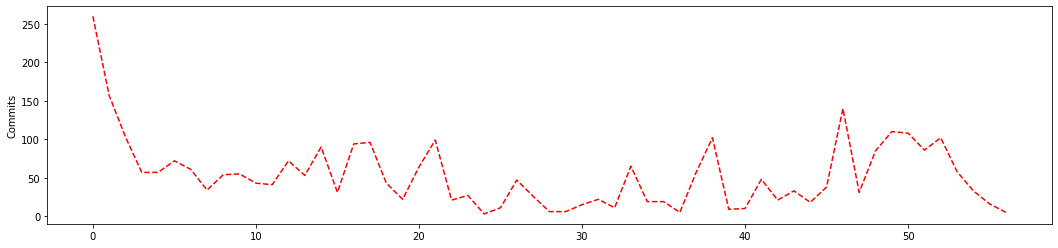

In [107]:
# plotting, the data we need:
import matplotlib.pyplot as plt
# plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.rcParams["figure.figsize"] = (18,4)
plt.plot(ccnt, 'r--')
plt.ylabel('Commits')
plt.show()
# date ticks - https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html


In [ ]:
# TODO 
# 1 - Clone remaining repos (x5 ?)
# 2 - Get min/max commit ranges
# 3 - Write function to insert commits/authors in sorted array, based on a given YYYYMM range
# 4 - Multi-plot